In [1]:
import os

import pandas
import numpy
import matplotlib.pyplot as plt

from ProblemInstance import ProblemInstance
from baseline_intra import bl_intra_1
from baseline_request import bl_req_FCFS
from our_approach import leader_follower

In [2]:
fontsize = 15
neurosim_dir = "NetStructure"  # directory store network structure description file following NeuroSim
summary_file = "NeuroSIMOut/summary.csv"  # simulation result get from NeuroSim

In [3]:
def get_time(problem, plan): 
    return problem.running_time(*problem.get_pc_packages_from_plan(*plan))

In [4]:
seed = 10
n_req = 200

intra_times = []
inter_times = []
our_times = []

multi_model_problem = ProblemInstance(neurosim_dir)
multi_model_problem.read_nn_profile(summary_file)
N_M = multi_model_problem.N_M
nn_ids = numpy.argsort(multi_model_problem.profile["L"])[::-1]
for i in range(1, N_M):
    multi_model_problem.get_random_requests(n_req, nn_ids=nn_ids[:i+1], seed=seed)
    
    plan_intra = bl_intra_1(multi_model_problem)
    time_intra = get_time(multi_model_problem, plan_intra)
    intra_times.append(time_intra)
    
    package_inter = bl_req_FCFS(multi_model_problem) 
    time_inter = multi_model_problem.running_time(*package_inter)
    inter_times.append(time_inter)
    
    plan_our = leader_follower(multi_model_problem)
    time_our = get_time(multi_model_problem, plan_our)
    our_times.append(time_our)

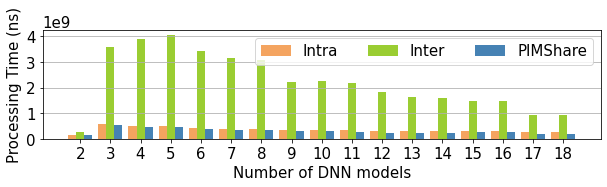

In [5]:
plt.figure(figsize=(10, 2))
names = numpy.arange(2, N_M+1)
n_col = 3
width = 6
width_per_col = width/n_col
base_xticks = numpy.arange(len(names)) * (width+1.5)
plt.bar(base_xticks-width/2, intra_times, width=width_per_col, label="Intra", color="sandybrown")
plt.bar(base_xticks-width/2 + width_per_col, inter_times, width=width_per_col, label="Inter", color="yellowgreen")
plt.bar(base_xticks-width/2 + width_per_col*2, our_times, width=width_per_col, label="PIMShare", color="steelblue")

plt.xticks(ticks=base_xticks-width_per_col/2, labels=names,rotation=0, fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.gca().yaxis.offsetText.set_fontsize(fontsize)
plt.xlabel("Number of DNN models", fontsize=fontsize)
plt.ylabel("Processing Time (ns)", fontsize=fontsize)
plt.legend(ncol=3, fontsize=fontsize)
plt.grid(axis='y')
plt.show()

In [6]:
seed = 1
n_req = 200
n_req_step = 20
n_req_start = n_req//n_req_step

intra_times = []
inter_times = []
our_times = []

multi_model_problem = ProblemInstance(neurosim_dir)
multi_model_problem.read_nn_profile(summary_file)
N_M = multi_model_problem.N_M
for i in range(n_req_start, n_req+n_req//n_req_step, n_req//n_req_step):
    multi_model_problem.get_random_requests(i, seed=seed)
    
    plan_intra = bl_intra_1(multi_model_problem)
    time_intra = get_time(multi_model_problem, plan_intra)
    intra_times.append(time_intra)
    
    package_inter = bl_req_FCFS(multi_model_problem) 
    time_inter = multi_model_problem.running_time(*package_inter)
    inter_times.append(time_inter)
    
    plan_our = leader_follower(multi_model_problem)
    time_our = get_time(multi_model_problem, plan_our)
    our_times.append(time_our)

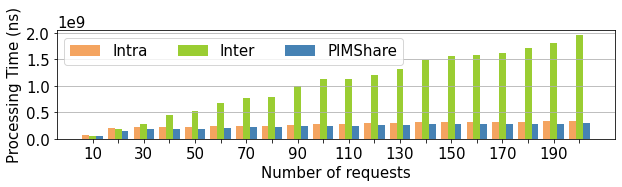

In [7]:
plt.figure(figsize=(10, 2))
names = numpy.arange(n_req_start, n_req+n_req//n_req_step, n_req//n_req_step)
n_col = 3
width = 6
width_per_col = width/n_col
base_xticks = numpy.arange(len(names)) * (width+1.5)
plt.bar(base_xticks-width/2, intra_times, width=width_per_col, label="Intra", color='sandybrown')
plt.bar(base_xticks-width/2 + width_per_col, inter_times, width=width_per_col, label="Inter", color='yellowgreen')
plt.bar(base_xticks-width/2 + width_per_col*2, our_times, width=width_per_col, label="PIMShare", color="steelblue")

plt.xticks(ticks=base_xticks-width_per_col/2, labels=[n if i%2==0 else "" for i,n in enumerate(names)], rotation=0, fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.gca().yaxis.offsetText.set_fontsize(fontsize)
plt.xlabel("Number of requests", fontsize=fontsize)
plt.ylabel("Processing Time (ns)", fontsize=fontsize)
plt.legend(ncol=3, fontsize=fontsize)
plt.grid(axis='y')
plt.show()